# Programming tasks: part 8
Required datasets: `abalone.csv`, `heart.csv`, `pima.csv`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

## Task 1

### a)

Load `heart.csv` and split the dataset into training (70%) and test sets.

In [2]:
dataframe = pandas.read_csv('heart.csv', header = 0)
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
data = dataframe.values
X, y = data[:,:-1], data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X.shape, X_train.shape)

(303, 13) (227, 13)


### b) 

Scale the training and test data using mean and standard deviation calculated on the training set.

In [5]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit(X_test)

### c)

Fit a kNN method on the training set for k=10, 20, 40, 60, 100, 200. Find k for which the AUC score is optimal.

In [6]:
ks = [10,20,40,60,100,200]
aucs =[]
for k in ks:
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train_std, y_train)
  prob = model.predict_proba(X_test)
  aucs.append(roc_auc_score(y_test,prob[:,1]))

print(np.array([ks,aucs]))
kopt = ks[np.where(aucs==max(aucs))[0][0]]
print(kopt)

[[ 10.          20.          40.          60.         100.
  200.        ]
 [  0.609375     0.40767045   0.71519886   0.66867898   0.72869318
    0.64559659]]
100


### d)

For the optimal k train a kNN method using uniform weights and weigths dependant on the distance between an observation an its neighbour. Compare AUC scores.

In [7]:
m1 = KNeighborsClassifier(n_neighbors=kopt, weights = 'uniform')
m1.fit(X_train_std, y_train)
pred1 = m1.predict_proba(X_test)
auc1 = roc_auc_score(y_test, pred1[:,1])

m2 = KNeighborsClassifier(n_neighbors=kopt, weights = 'distance')
m2.fit(X_train_std, y_train)
pred2 = m2.predict_proba(X_test)
auc2 = roc_auc_score(y_test, pred2[:,1])

print(auc1, auc2)

0.7286931818181819 0.7258522727272727


Using uniform weigths gives us slightly better results.

## Task 2

### a) 
Load `pima.csv` and split the dataset into trainingand test sets, so that the training set indcludes the first 70% of observations.

In [8]:
dataframe = pandas.read_csv('pima.csv', header=0, )
dataframe.head()

,times,glucose,blood,skin,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   times     768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   blood     768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   BMI       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   class     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data = dataframe.values
X, y = data[:,:-1], data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle=False)

### b)

Create a histogram for the `blood` column on the training set. What can we see?

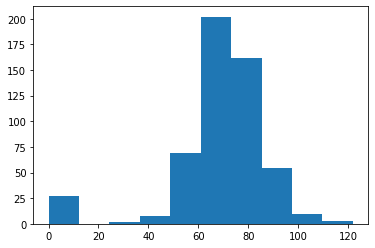

In [11]:
plt.hist(X_train[:,2])
plt.show()

The column `blood` stores patients' blood pressure levels. A lot of values in this column are 0 - these are most likely missing data.

### c)
Replace missing data in the `blood` column in the training and test sets using
* mean calculated on the training set
* median calculated on the training set

In [12]:
X_train2 = X_train.copy()
X_test2 = X_test.copy()

X_train2[X_train2[:,2]==0] = np.nan
X_test2[X_test2[:,2]==0] = np.nan

In [13]:
X_train2[:9,2]

array([72., 66., 64., 66., 40., 74., 50., nan, 70.])

In [14]:
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
median_imputer = SimpleImputer(missing_values=np.nan, strategy='median')

X_train_mean = mean_imputer.fit_transform(X_train2)
X_test_mean = mean_imputer.transform(X_test2)

X_train_median = median_imputer.fit_transform(X_train2)
X_test_median = median_imputer.transform(X_test2)

In [15]:
X_train_mean[:9,2]

array([72.        , 66.        , 64.        , 66.        , 40.        ,
       74.        , 50.        , 72.10980392, 70.        ])

### d)

Replace missing values using:

* ridge regression
* decision tree regression

In [16]:
ridge_imputer = IterativeImputer(missing_values=np.nan, estimator = BayesianRidge(n_iter = 10000000000000))
tree_imputer = IterativeImputer(missing_values=np.nan, estimator=DecisionTreeRegressor())

X_train_ridge = ridge_imputer.fit_transform(X_train2)
X_test_ridge = ridge_imputer.transform(X_test2)

X_train_tree = tree_imputer.fit_transform(X_train2)
X_test_tree = tree_imputer.transform(X_test2)

In [17]:
X_train_ridge[:9,2]

array([72.        , 66.        , 64.        , 66.        , 40.        ,
       74.        , 50.        , 72.10980392, 70.        ])

### e)

Using the transformed datasets train a logistic regression model (without regularization) and calculate accuracy for each dataset.

In [18]:
l = LogisticRegression(max_iter = 10000,penalty = 'none')
l.fit(X_train,y_train)
print(l.score(X_test,y_test))
l.fit(X_train_mean,y_train)
print(l.score(X_test_mean,y_test))
l.fit(X_train_median,y_train)
print(l.score(X_test_median,y_test))
l.fit(X_train_ridge,y_train)
print(l.score(X_test_ridge,y_test))
l.fit(X_train_tree,y_train)
print(l.score(X_test_tree,y_test))

0.7922077922077922
0.7922077922077922
0.7922077922077922
0.7922077922077922
0.7922077922077922


## Task 3

### a)
Load `abalone.csv` and split the dataset into training and test sets. The training set should include first 70% of records.

In [19]:
dataframe = pandas.read_csv('abalone.csv', header = 0)
dataframe.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,1,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
4,1,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16


In [20]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2834 entries, 0 to 2833
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           2834 non-null   int64  
 1   LongestShell   2834 non-null   float64
 2   Diameter       2834 non-null   float64
 3   Height         2834 non-null   float64
 4   WholeWeight    2834 non-null   float64
 5   ShuckedWeight  2834 non-null   float64
 6   VisceraWeight  2834 non-null   float64
 7   ShellWeight    2834 non-null   float64
 8   Rings          2834 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 199.4 KB


In [21]:
data = dataframe.values
X, y = data[:,1:], data[:,0]

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,shuffle=False)

### b)
Consider the `rings.csv` variable. Identify outliers (and change their values to NA) on the training and test set using the three sigma rule with mean calculated on the training set.


In [22]:
rings_train = X_train[:,-1]
rings_test = X_test[:,-1]
m, std = np.mean(rings_train), np.std(rings_train)
which_outlier_train = np.abs(rings_train-m)>=3*std
which_outlier_test = np.abs(rings_test-m)>=3*std

X_train2 = X_train.copy()
X_test2 = X_test.copy()
X_train2[which_outlier_train,-1] = np.nan
X_test2[which_outlier_test,-1] = np.nan

### c)
Fill the missing values in the training and test set using the median calculated on the training set.

In [23]:
si = SimpleImputer(strategy='median')
X_train2 = si.fit_transform(X_train2)
X_test2 = si.transform(X_test2)